In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Loading Climate data

In [3]:

file_path_gf = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gafsa/climate data.csv"
df_climate_gafsa= pd.read_csv(file_path_gf, skiprows=18, na_values=['-999.0'])


file_path_k = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/Kairouan/climate data.csv"
df_climate_Kairouan= pd.read_csv(file_path_k, skiprows=18, na_values=['-999.0'])


file_path_j = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/jendouba/climate data.csv"
df_climate_jendouba= pd.read_csv(file_path_j, skiprows=18, na_values=['-999.0'])


file_path_t = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/tunis/climate data.csv"
df_climate_tunis= pd.read_csv(file_path_t, skiprows=18, na_values=['-999.0'])


file_path_g = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/climate data.csv"
df_climate_gabes= pd.read_csv(file_path_g, skiprows=18, na_values=['-999.0'])


# Merging the different climate data files

In [4]:
import pandas as pd

# Assuming these are your already loaded DataFrames
df_climate_gafsa["Region"] = "Gafsa"
df_climate_gabes["Region"] = "Gabes"
df_climate_Kairouan["Region"] = "Kairouan"
df_climate_tunis["Region"] = "Tunis"
df_climate_jendouba["Region"] = "Jendouba"

# Combine all DataFrames into one
climate_data_combined = pd.concat([df_climate_gafsa, df_climate_gabes, df_climate_Kairouan, df_climate_tunis, df_climate_jendouba], ignore_index=True)

# Display the first few rows
print(climate_data_combined.head())

# Save to a CSV file if needed
climate_data_combined.to_csv("climate_data_combined.csv", index=False)


   YEAR  MO  DY  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  ALLSKY_KT  \
0  1990   1   1               2.19               2.91       0.46   
1  1990   1   2               2.60               3.15       0.55   
2  1990   1   3               2.72               3.34       0.57   
3  1990   1   4               1.52               3.32       0.31   
4  1990   1   5               1.68               3.28       0.34   

   ALLSKY_SFC_LW_DWN  ALLSKY_SFC_PAR_TOT  CLRSKY_SFC_PAR_TOT  ALLSKY_SFC_UVA  \
0              312.5                43.7                 NaN             NaN   
1              317.2                50.8                 NaN             NaN   
2              303.4                53.5                 NaN             NaN   
3              315.0                31.3                 NaN             NaN   
4              315.3                33.9                 NaN             NaN   

   ALLSKY_SFC_UVB  ALLSKY_SFC_UV_INDEX  WS2M Region  
0             NaN                  NaN  2.54  Gafsa  
1 

# Deleting Nan values

In [5]:
# Remove rows with NaN values
climate_data_combined_cleaned = climate_data_combined.dropna()

# Display the number of rows before and after cleaning
print(f"Rows before cleaning: {climate_data_combined.shape[0]}")
print(f"Rows after cleaning: {climate_data_combined_cleaned.shape[0]}")

# Save the cleaned dataset (optional)
climate_data_combined_cleaned.to_csv("climate_data_cleaned.csv", index=False)


Rows before cleaning: 62680
Rows after cleaning: 40557


In [6]:

missing_values = climate_data_combined_cleaned.isnull().sum()
print(missing_values)

YEAR                   0
MO                     0
DY                     0
ALLSKY_SFC_SW_DWN      0
CLRSKY_SFC_SW_DWN      0
ALLSKY_KT              0
ALLSKY_SFC_LW_DWN      0
ALLSKY_SFC_PAR_TOT     0
CLRSKY_SFC_PAR_TOT     0
ALLSKY_SFC_UVA         0
ALLSKY_SFC_UVB         0
ALLSKY_SFC_UV_INDEX    0
WS2M                   0
Region                 0
dtype: int64


In [11]:
climate_data_combined_cleaned

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,WS2M,Region
4018,2001,1,1,3.56,3.60,0.74,243.04,62.17,63.82,7.37,0.09,0.46,2.73,Gafsa
4019,2001,1,2,3.29,3.53,0.69,261.65,57.98,63.16,6.98,0.09,0.47,3.66,Gafsa
4020,2001,1,3,3.60,3.57,0.75,254.45,63.33,63.79,7.47,0.11,0.54,1.70,Gafsa
4021,2001,1,4,3.06,3.34,0.63,277.16,54.91,60.49,6.61,0.09,0.43,2.55,Gafsa
4022,2001,1,5,3.48,3.49,0.72,283.01,62.14,63.25,7.36,0.09,0.46,2.27,Gafsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62558,2023,12,28,2.90,2.95,0.66,281.97,51.25,52.81,5.86,0.08,0.39,1.34,Jendouba
62559,2023,12,29,2.90,2.95,0.66,281.52,51.48,52.90,5.89,0.07,0.36,1.16,Jendouba
62560,2023,12,30,1.65,2.88,0.38,315.14,30.09,51.94,4.02,0.05,0.27,1.07,Jendouba
62561,2023,12,31,2.90,2.95,0.66,283.64,51.45,52.98,5.88,0.07,0.34,1.33,Jendouba


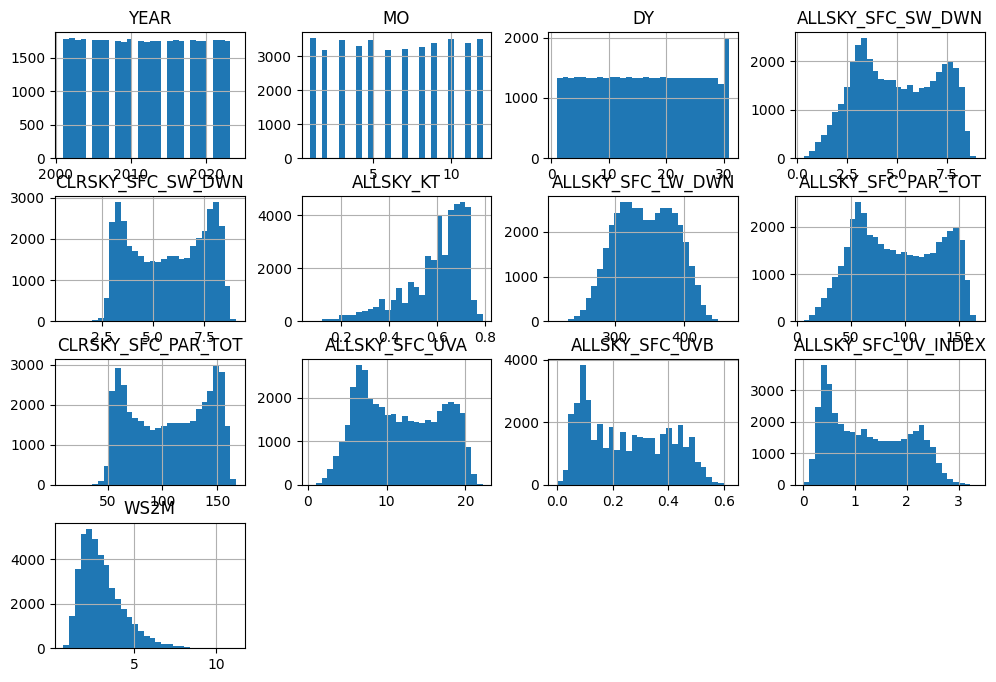

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for all numerical columns
climate_data_combined_cleaned.hist(figsize=(12, 8), bins=30)
plt.show()


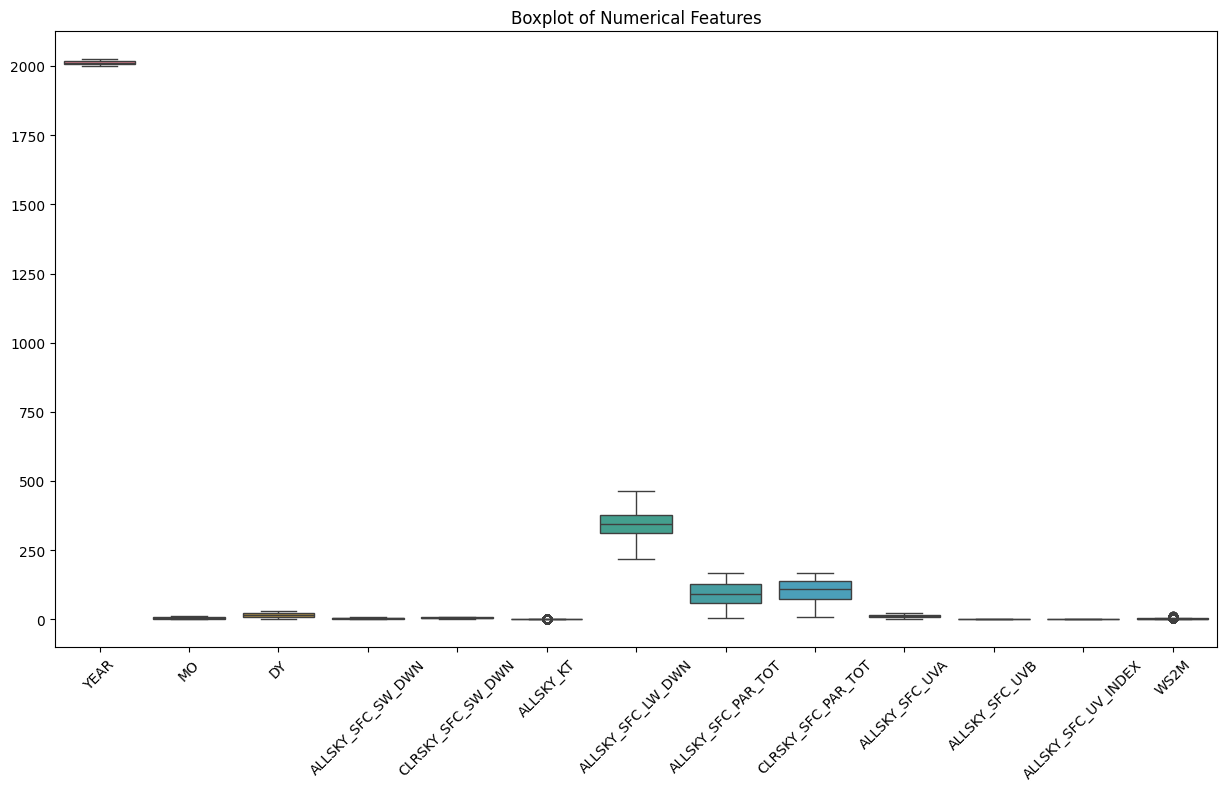

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=climate_data_combined_cleaned)
plt.xticks(rotation=45)  # Rotate labels if needed
plt.title("Boxplot of Numerical Features")
plt.show()


<ipython-input-15-c0fa34488c5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=climate_data_combined_cleaned, palette="viridis")


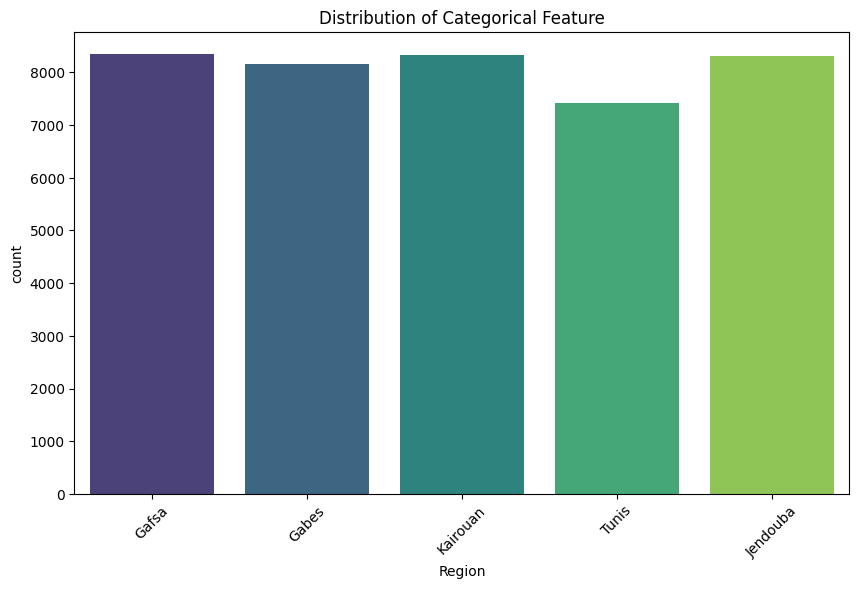

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Region", data=climate_data_combined_cleaned, palette="viridis")
plt.title("Distribution of Categorical Feature")
plt.xticks(rotation=45)
plt.show()


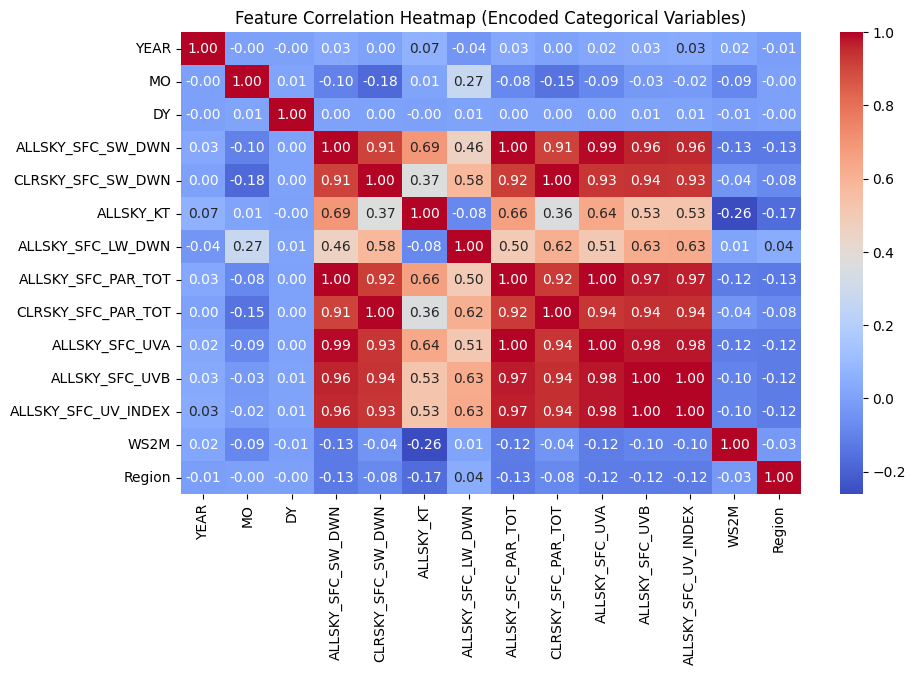

In [17]:
from sklearn.preprocessing import LabelEncoder

df_encoded = climate_data_combined_cleaned.copy()  # Work on a copy
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:  # Encode only object (string) columns
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

# Now plot the heatmap with encoded values
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (Encoded Categorical Variables)")
plt.show()


# Loading Climate data 2 files

In [ ]:

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/climate data 2.csv"
df_climate2_gabes= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gafsa/climate data 2.csv"
df_climate2_gafsa= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/Kairouan/climate data 2.csv"
df_climate2_Kairouan= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/tunis/climate data 2.csv"
df_climate2_tunis= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/jendouba/climate data 2.csv"
df_climate2_jendouba= pd.read_csv(file_path, skiprows=25, na_values=['-999.0'])

# Merging climate data 2 files

In [ ]:
import pandas as pd

# Assuming these are your already loaded DataFrames
df_climate2_gafsa["Region"] = "Gafsa"
df_climate2_gabes["Region"] = "Gabes"
df_climate2_Kairouan["Region"] = "Kairouan"
df_climate2_tunis["Region"] = "Tunis"
df_climate2_jendouba["Region"] = "Jendouba"

# Combine all DataFrames into one
climate_data2_combined = pd.concat([df_climate2_gafsa, df_climate2_gabes, df_climate2_Kairouan, df_climate2_tunis, df_climate2_jendouba], ignore_index=True)


# Save to a CSV file if needed
#climate_data2_combined.to_csv("climate_data2_combined.csv", index=False)

climate_data2_combined



,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,RH2M,PRECTOTCORR,PS,WS10M,WS10M_RANGE,WD10M,WS50M,WS50M_RANGE,WD50M,Region
0,1990,1,1,10.88,5.32,8.10,10.70,9.66,16.59,6.93,...,71.25,0.32,96.63,3.76,4.13,346.75,5.98,4.09,346.94,Gafsa
1,1990,1,2,9.08,3.55,6.31,8.52,11.12,15.20,4.07,...,71.69,0.01,97.00,3.02,1.77,312.94,4.83,4.80,313.12,Gafsa
2,1990,1,3,8.90,3.95,6.43,8.52,11.29,15.56,4.26,...,73.44,0.00,96.86,2.72,2.26,184.75,3.92,3.10,185.56,Gafsa
3,1990,1,4,7.83,3.29,5.55,6.23,6.68,11.84,5.16,...,73.69,0.08,96.49,2.25,3.63,141.38,3.63,7.12,141.69,Gafsa
4,1990,1,5,9.83,5.75,7.79,9.45,8.52,14.91,6.40,...,76.62,2.81,96.64,6.84,5.16,55.69,9.54,4.96,56.19,Gafsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62675,2024,4,23,13.01,6.05,9.53,14.64,10.88,19.00,8.12,...,66.06,1.51,97.16,3.46,4.37,265.75,4.70,4.99,263.88,Jendouba
62676,2024,4,24,10.84,4.98,7.91,11.94,7.93,14.40,6.48,...,70.19,2.14,97.29,5.42,8.18,313.12,7.22,9.06,313.06,Jendouba
62677,2024,4,25,13.44,2.58,8.01,14.83,20.21,23.65,3.44,...,56.94,0.00,97.05,3.28,1.74,201.38,4.82,3.01,214.38,Jendouba
62678,2024,4,26,16.82,6.01,11.41,17.52,15.07,25.49,10.42,...,51.62,0.03,96.75,3.84,3.37,199.19,5.77,4.19,199.12,Jendouba


In [ ]:
# Remove rows with NaN values
climate_data2_combined_cleaned = climate_data2_combined.dropna()

# Display the number of rows before and after cleaning
print(f"Rows before cleaning: {climate_data2_combined.shape[0]}")
print(f"Rows after cleaning: {climate_data2_combined_cleaned.shape[0]}")

# Save the cleaned dataset (optional)
climate_data2_combined_cleaned.to_csv("climate_data_cleaned.csv", index=False)

climate_data2_combined_cleaned


Rows before cleaning: 62680
Rows after cleaning: 62673


,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,RH2M,PRECTOTCORR,PS,WS10M,WS10M_RANGE,WD10M,WS50M,WS50M_RANGE,WD50M,Region
0,1990,1,1,10.88,5.32,8.10,10.70,9.66,16.59,6.93,...,71.25,0.32,96.63,3.76,4.13,346.75,5.98,4.09,346.94,Gafsa
1,1990,1,2,9.08,3.55,6.31,8.52,11.12,15.20,4.07,...,71.69,0.01,97.00,3.02,1.77,312.94,4.83,4.80,313.12,Gafsa
2,1990,1,3,8.90,3.95,6.43,8.52,11.29,15.56,4.26,...,73.44,0.00,96.86,2.72,2.26,184.75,3.92,3.10,185.56,Gafsa
3,1990,1,4,7.83,3.29,5.55,6.23,6.68,11.84,5.16,...,73.69,0.08,96.49,2.25,3.63,141.38,3.63,7.12,141.69,Gafsa
4,1990,1,5,9.83,5.75,7.79,9.45,8.52,14.91,6.40,...,76.62,2.81,96.64,6.84,5.16,55.69,9.54,4.96,56.19,Gafsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62674,2024,4,22,13.26,4.62,8.94,14.62,11.47,19.87,8.40,...,60.56,0.00,97.11,2.99,4.77,285.75,3.91,5.30,285.75,Jendouba
62675,2024,4,23,13.01,6.05,9.53,14.64,10.88,19.00,8.12,...,66.06,1.51,97.16,3.46,4.37,265.75,4.70,4.99,263.88,Jendouba
62676,2024,4,24,10.84,4.98,7.91,11.94,7.93,14.40,6.48,...,70.19,2.14,97.29,5.42,8.18,313.12,7.22,9.06,313.06,Jendouba
62677,2024,4,25,13.44,2.58,8.01,14.83,20.21,23.65,3.44,...,56.94,0.00,97.05,3.28,1.74,201.38,4.82,3.01,214.38,Jendouba


In [ ]:

missing_values = climate_data2_combined_cleaned.isnull().sum()
print(missing_values)

YEAR           0
MO             0
DY             0
T2M            0
T2MDEW         0
T2MWET         0
TS             0
T2M_RANGE      0
T2M_MAX        0
T2M_MIN        0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M          0
WS10M_RANGE    0
WD10M          0
WS50M          0
WS50M_RANGE    0
WD50M          0
Region         0
dtype: int64


In [ ]:

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/soil data.csv"
df_soil_gabes= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gafsa/soil data.csv"
df_soil_gafsa= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/tunis/soil data.csv"
df_soil_tunis= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/jendouba/soil data.csv"
df_soil_jendouba= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])


file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/Kairouan/soil data.csv"
df_soil_Kairouan= pd.read_csv(file_path, skiprows=11, na_values=['-999.0'])


In [ ]:
import pandas as pd

# Assuming these are your already loaded DataFrames
df_soil_gafsa["Region"] = "Gafsa"
df_soil_gabes["Region"] = "Gabes"
df_soil_Kairouan["Region"] = "Kairouan"
df_soil_tunis["Region"] = "Tunis"
df_soil_jendouba["Region"] = "Jendouba"

# Combine all DataFrames into one
soil_data_combined = pd.concat([df_soil_gafsa, df_soil_gabes, df_soil_Kairouan, df_soil_tunis, df_soil_jendouba], ignore_index=True)


# Save to a CSV file if needed
#climate_data2_combined.to_csv("climate_data2_combined.csv", index=False)

climate_data2_combined



,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,...,RH2M,PRECTOTCORR,PS,WS10M,WS10M_RANGE,WD10M,WS50M,WS50M_RANGE,WD50M,Region
0,1990,1,1,10.88,5.32,8.10,10.70,9.66,16.59,6.93,...,71.25,0.32,96.63,3.76,4.13,346.75,5.98,4.09,346.94,Gafsa
1,1990,1,2,9.08,3.55,6.31,8.52,11.12,15.20,4.07,...,71.69,0.01,97.00,3.02,1.77,312.94,4.83,4.80,313.12,Gafsa
2,1990,1,3,8.90,3.95,6.43,8.52,11.29,15.56,4.26,...,73.44,0.00,96.86,2.72,2.26,184.75,3.92,3.10,185.56,Gafsa
3,1990,1,4,7.83,3.29,5.55,6.23,6.68,11.84,5.16,...,73.69,0.08,96.49,2.25,3.63,141.38,3.63,7.12,141.69,Gafsa
4,1990,1,5,9.83,5.75,7.79,9.45,8.52,14.91,6.40,...,76.62,2.81,96.64,6.84,5.16,55.69,9.54,4.96,56.19,Gafsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62675,2024,4,23,13.01,6.05,9.53,14.64,10.88,19.00,8.12,...,66.06,1.51,97.16,3.46,4.37,265.75,4.70,4.99,263.88,Jendouba
62676,2024,4,24,10.84,4.98,7.91,11.94,7.93,14.40,6.48,...,70.19,2.14,97.29,5.42,8.18,313.12,7.22,9.06,313.06,Jendouba
62677,2024,4,25,13.44,2.58,8.01,14.83,20.21,23.65,3.44,...,56.94,0.00,97.05,3.28,1.74,201.38,4.82,3.01,214.38,Jendouba
62678,2024,4,26,16.82,6.01,11.41,17.52,15.07,25.49,10.42,...,51.62,0.03,96.75,3.84,3.37,199.19,5.77,4.19,199.12,Jendouba


In [ ]:

missing_values = df_soil_gabes.isnull().sum()
print(missing_values)

YEAR        0
DOY         0
GWETTOP     0
GWETROOT    0
GWETPROF    0
dtype: int64


In [ ]:

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/Monthly Air Column Concentration of Ozone.csv"
df_air_gabes= pd.read_csv(file_path)

df_air_gabes

,"DATETIME,TIME,LON,LAT,TOTAL_COLUMN_OZONE"
0,"""OCT-2004"",12692,10,34,349.194"
1,"""NOV-2004"",12723,10,34,366.507"
2,"""DEC-2004"",12753,10,34,371.069"
3,"""JAN-2005"",12784,10,34,393.133"
4,"""FEB-2005"",12815,10,34,413.102"
...,...
221,"""MAR-2023"",19417,10,34,307.969"
222,"""APR-2023"",19448,10,34,333.424"
223,"""MAY-2023"",19478,10,34,328.816"
224,"""JUN-2023"",19509,10,34,312.821"


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['DATETIME,TIME,LON,LAT,TOTAL_COLUMN_OZONE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'DATETIME,TIME,LON,LAT,TOTAL_COLUMN_OZONE'}, axis=1)
              .sort_values('DATETIME,TIME,LON,LAT,TOTAL_COLUMN_OZONE', ascending=True))
  xs = counted['DATETIME,TIME,LON,LAT,TOTAL_COLUMN_OZONE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('DATETIME,TIME,LON,LAT,TOTAL_COLUMN_OZONE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATETIME,TIME,LON,LAT,TOTAL_COLUMN_OZONE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:

missing_values = df_air_gabes.isnull().sum()
print(missing_values)

DATETIME,TIME,LON,LAT,TOTAL_COLUMN_OZONE    0
dtype: int64


In [ ]:

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/Monthly Average Precipitation Rate.csv"
df_prep_gabes= pd.read_csv(file_path)

df_prep_gabes


,"DATETIME,TIME,LON,LAT,PRECIP"
0,"""JAN-1979"",65378,8.75,33.75,0.266404"
1,"""FEB-1979"",65409,8.75,33.75,1.67748"
2,"""MAR-1979"",65437,8.75,33.75,1.13462"
3,"""APR-1979"",65468,8.75,33.75,0.638729"
4,"""MAY-1979"",65498,8.75,33.75,0.195212"
...,...
534,"""JUL-2023"",81630,8.75,33.75,0.0434763"
535,"""AUG-2023"",81661,8.75,33.75,0.279214"
536,"""SEP-2023"",81692,8.75,33.75,0.0332523"
537,"""OCT-2023"",81722,8.75,33.75,0.0707902"


In [ ]:

missing_values = df_prep_gabes.isnull().sum()
print(missing_values)

DATETIME,TIME,LON,LAT,PRECIP    0
dtype: int64


In [ ]:

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/Monthly Tropospheric Concentration of CO2.csv"
df_con_gabes= pd.read_csv(file_path)

df_con_gabes

,"DATETIME,TIME,LON,LAT,CO2_PPMV_UPPERTROP"
0,"""SEP-2002"",0,10.5,33.5,373.157"
1,"""OCT-2002"",1,10.5,33.5,373.002"
2,"""NOV-2002"",2,10.5,33.5,373.571"
3,"""DEC-2002"",3,10.5,33.5,374.337"
4,"""JAN-2003"",4,10.5,33.5,375.551"
...,...
247,"""APR-2023"",247,10.5,33.5,418.089"
248,"""MAY-2023"",248,10.5,33.5,415.677"
249,"""JUN-2023"",249,10.5,33.5,417.56"
250,"""JUL-2023"",250,10.5,33.5,417.704"


In [ ]:

missing_values = df_con_gabes.isnull().sum()
print(missing_values)

DATETIME,TIME,LON,LAT,CO2_PPMV_UPPERTROP    0
dtype: int64


In [ ]:

file_path = "/content/drive/My Drive/Greenhouse gases, soil and climate Data - Tunisia/tunis data/gabes/Monthly Water Vapor in the Atmosphere.csv"
df_vapor_gabes= pd.read_csv(file_path)

df_vapor_gabes


,"DATETIME,TIME,LON,LAT,TOTVAP"
0,"""SEP-2002"",0,10,34,29.9668"
1,"""OCT-2002"",1,10,34,22.4434"
2,"""OCT-2002"",2,10,34,18.4932"
3,"""DEC-2002"",3,10,34,14.7681"
4,"""DEC-2002"",4,10,34,13.4761"
...,...
233,"""JAN-2022"",233,10,34,12.1724"
234,"""MAR-2022"",234,10,34,13.7119"
235,"""APR-2022"",235,10,34,15.4639"
236,"""MAY-2022"",236,10,34,17.4971"


In [ ]:

missing_values = df_vapor_gabes.isnull().sum()
print(missing_values)

DATETIME,TIME,LON,LAT,TOTVAP    0
dtype: int64
